In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from pydub import AudioSegment
from scipy.signal import sawtooth, square

SAVE_DIR = Path("../output")


In [2]:
def generate_sine_wave(
    amplitude: float,
    frequency: float,
    sampling_rate: float,
    duration: float,
) -> tuple[np.ndarray, np.ndarray]:
    time = np.arange(0, duration, 1 / sampling_rate)
    signal = amplitude * np.sin(2 * np.pi * frequency * time)
    return time, signal


def generate_square_wave(
    amplitude: float,
    frequency: float,
    sampling_rate: float,
    duration: float,
) -> tuple[np.ndarray, np.ndarray]:
    time = np.arange(0, duration, 1 / sampling_rate)
    signal = amplitude * square(2 * np.pi * frequency * time)
    return time, signal


def generate_sawtooth_wave(
    amplitude: float,
    frequency: float,
    sampling_rate: float,
    duration: float,
) -> tuple[np.ndarray, np.ndarray]:
    time = np.arange(0, duration, 1 / sampling_rate)
    signal = amplitude * sawtooth(2 * np.pi * frequency * time)
    return time, signal


def generate_triangle_wave(
    amplitude: float,
    frequency: float,
    sampling_rate: float,
    duration: float,
) -> tuple[np.ndarray, np.ndarray]:
    time = np.arange(0, duration, 1 / sampling_rate)
    signal = amplitude * sawtooth(2 * np.pi * frequency * time, width=0.5)
    return time, signal


In [3]:
def plot_wave(
    time: np.ndarray,
    signal: np.ndarray,
    sampling_rate: float,
    title: str,
    plot_duration: float = 0.01,
) -> None:
    plt.figure(figsize=(10, 2), dpi=120)
    plt.plot(time[: int(plot_duration * sampling_rate)], signal[: int(plot_duration * sampling_rate)])
    plt.title(title)
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()


In [4]:
def numpy_to_audio_segment(signal: np.ndarray, sampling_rate: int) -> AudioSegment:
    signal_int16 = (signal * np.iinfo(np.int16).max).astype(np.int16)
    return AudioSegment(
        signal_int16.tobytes(),
        frame_rate=sampling_rate,
        sample_width=signal_int16.dtype.itemsize,
        channels=1,
    )

In [5]:
amplitude = 1
frequency = 440
sampling_rate = 44100
duration = 2

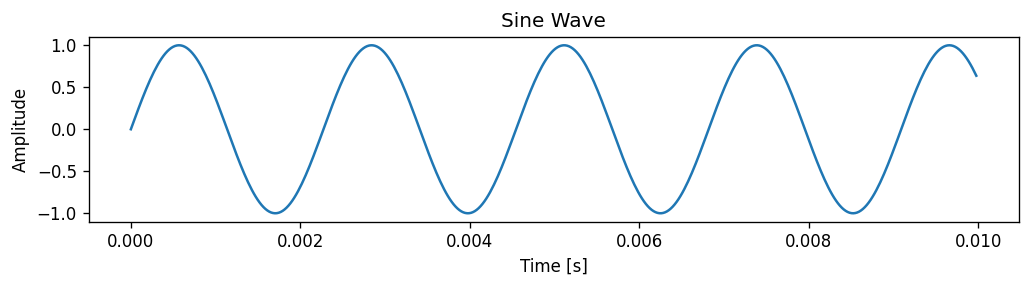

In [6]:
time, signal = generate_sine_wave(amplitude, frequency, sampling_rate, duration)
audio = numpy_to_audio_segment(signal, sampling_rate)
audio.export(SAVE_DIR / "sine_wave.mp3", format="mp3")
plot_wave(time, signal, sampling_rate, "Sine Wave")
Audio(signal, rate=sampling_rate)

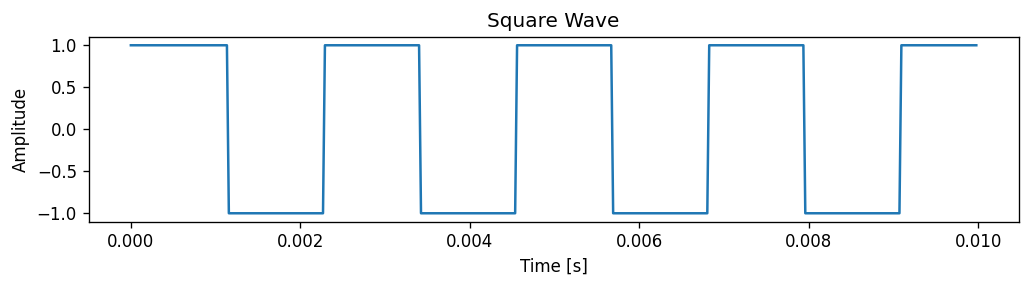

In [7]:
time, signal = generate_square_wave(amplitude, frequency, sampling_rate, duration)
audio = numpy_to_audio_segment(signal, sampling_rate)
audio.export(SAVE_DIR / "square_wave.mp3", format="mp3")
plot_wave(time, signal, sampling_rate, "Square Wave")
Audio(signal, rate=sampling_rate)

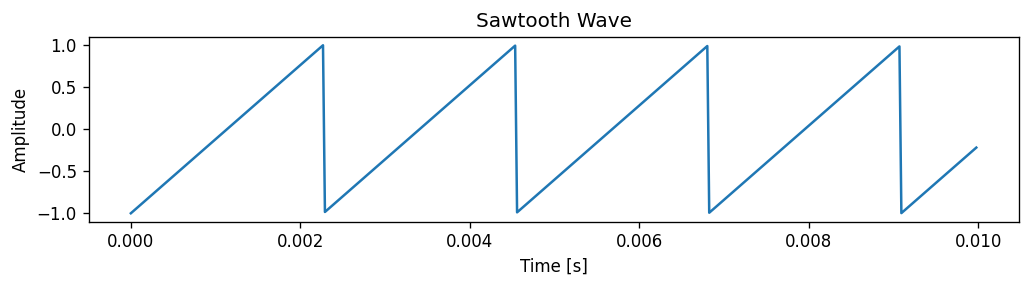

In [8]:
time, signal = generate_sawtooth_wave(amplitude, frequency, sampling_rate, duration)
audio = numpy_to_audio_segment(signal, sampling_rate)
audio.export(SAVE_DIR / "sawtooth.mp3", format="mp3")
plot_wave(time, signal, sampling_rate, "Sawtooth Wave")
Audio(signal, rate=sampling_rate)

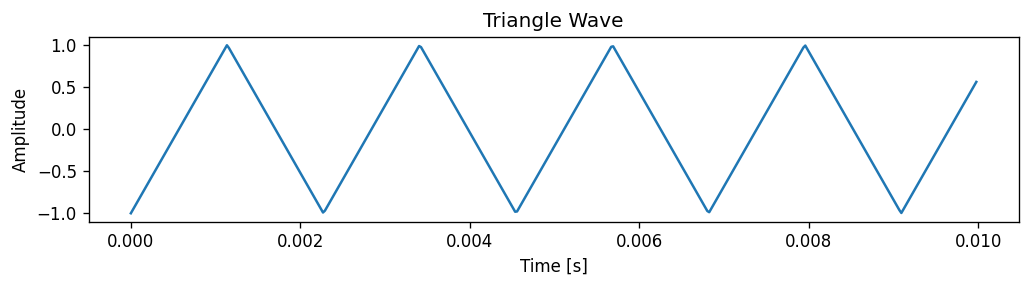

In [9]:
time, signal = generate_triangle_wave(amplitude, frequency, sampling_rate, duration)
audio = numpy_to_audio_segment(signal, sampling_rate)
audio.export(SAVE_DIR / "triangle.mp3", format="mp3")
plot_wave(time, signal, sampling_rate, "Triangle Wave")
Audio(signal, rate=sampling_rate)